## Goals

Prepare for Neural Nets from scratch by estimating a generalized linear model via gradient descent (from scracth). 

We'll (briefly) cover 
* Working with matrices and n dimensional arrays in numpy.
* Solving the least squares problem directly
* L1 Regularization
* Optimization, convexity and gradient descent.
* Solving the least square problem indirectly via gradient descent.
* Estimate logistic regression via gradient descent
* We'll wrap by estimating the logistic regression via Statsmodels, Scikit Learn, and TensorFlow!

References for this notebook
* Econometric Theory and Methods by Davidson and Mackinnon
* Elements of Statistical Learning by Hastie, Tibshirani, and Friedman
* Deep Learning by Goodfellow, Bengio, and Courville

## Prerequisites

Knowledge of the following is ideal.

* Sample moments of a random variable - mean, variance.  Please see https://en.wikipedia.org/wiki/Moment_(mathematics) for more detail
* Correlation - https://en.wikipedia.org/wiki/Correlation_and_dependence
* Regression - i.e., what is the point of regression https://en.wikipedia.org/wiki/Regression_analysis
* Matrix algebra and how a matrix is used to store date
* Some calculus - know what a derivative tells you https://en.wikipedia.org/wiki/Derivative

## Working with matrices in numpy

We'll be using the matrix class in numpy.  This is discouraged - please see https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html .  Feel free to redo this notebook with numpy arrays

## scipy.linalg vs numpy.linalg

`scipy.linalg` contains all the functions in `numpy.linalg`. plus some other more advanced ones not contained in `numpy.linalg`

see https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html for more details

## Matrix Operations

Below we'll demonstrate how to do some important operations necessary for regression from scracth, and we'll only highlight operations on matrices vs ndarrays when worth noting.

## Creating a matrix

In [1]:
import numpy as np

In [2]:
x = np.matrix([[2,7,6],[9,5,1],[4,3,8]])
print(type(x))
print(x)
# or
x_ndarray = np.array([[2,7,6],[9,5,1],[4,3,8]])
print("\n{}".format(type(x_ndarray)))
print(x_ndarray)

<class 'numpy.matrixlib.defmatrix.matrix'>
[[2 7 6]
 [9 5 1]
 [4 3 8]]

<class 'numpy.ndarray'>
[[2 7 6]
 [9 5 1]
 [4 3 8]]


The magice square above (call it $X$) is composed of 3 rows and 3 columns.  We will index elements by the row and column in which they appear.  For example, the element $X_{1,2}$ is 7 and $X_{3,3} = 8$.  Note that we are starting indexing from 1 and not 0.  We will index starting from 0 in our code

Generally, we will have a matrix $X$ of dimension $m \times n$, that is, $m$ rows and $n$ columns.  We'll use the following notations to refer to entire columns and / or rows very succinctly.  $(:,j)$ or $(i,:)$ which means all elements in the $j^{th}$ column and all elements in the $i^{th}$ row, repsectively.

### Transpose of a Matrix

Very fundamental operation is transposition - this is switching the row index with the column index for each element.  

In [3]:
print("X")
print(x)
print("\nX'")
print(x.T)

X
[[2 7 6]
 [9 5 1]
 [4 3 8]]

X'
[[2 9 4]
 [7 5 3]
 [6 1 8]]


### Slicing a matrix

Very often we'll be interested in a particular row or column or sub-matrix of a matrix.

In [4]:
# slicing
# first row
print("slicing a matrix\n")
print(x[0,:])
print("\nshape of x[0,:] is {}".format( x[0,:].shape))
print("\nvs slicing an ndarray\n")
print(x_ndarray[0,:])
print("\nshape of x_ndarray[0:] is {}".format(x_ndarray[0,:].shape))

slicing a matrix

[[2 7 6]]

shape of x[0,:] is (1, 3)

vs slicing an ndarray

[2 7 6]

shape of x_ndarray[0:] is (3,)


In [5]:
# slicing
# first column
print("slicing a matrix\n")
print(x[:,0])
print("\nshape of x[:,0] is {}".format( x[0,:].shape))
print("\nvs slicing an ndarray\n")
print(x_ndarray[:,0])
print("\nshape of x_ndarray[:,0] is {}".format(x_ndarray[0,:].shape))

slicing a matrix

[[2]
 [9]
 [4]]

shape of x[:,0] is (1, 3)

vs slicing an ndarray

[2 9 4]

shape of x_ndarray[:,0] is (3,)


In [6]:
# slicing 
# top 2x2 matrix
print(x[0:2,0:2])


[[2 7]
 [9 5]]


### Vectors

A vector is an array of numbers.  You could think of each row or each column of a matrix as a vector.  If $x$ is a vector of length $N$ we write $x \in \mathbb{R}^N$.  This is a succinct way to write a n-dimensional space where each dimension is represented by a real number ($\mathbb{R}$ means the set of real numbers))

### Dot Product

Given two vectors $x,y$ in $\mathbb{R}^n$, the dot product (or inner product) of $x$ and $y$, written $x\cdot y$ or sometimes $\left<x,y\right>$ is defined as 
$$\left<x,y\right> = \sum_{i=1}^n x_i y_i$$

For $x = y$, the square root of the dot product is called the $L_2$ norm or Euclidean norm and may be written $\|x\|_2$.    
If $x$ sums to zero ($x$ is centered), then $\|x\|_2^2$  divided by the length of $x$ minus 1 is the sample variance.  

## Inner product and correlation coefficient.  

For any two vectors $x,y \in \mathbb{R}^N$, we have 

$$\cos(\theta) = \frac{x\cdot y}{\|x\|\|y\|}$$

where $\theta$ is the angle between $x$ and $y$.  If $x$ and $y$ both sum to 0 then $\cos(\theta)$ is the correlation between $x$ and $y$.  Why?  because $\left<x,y\right>$ is the sample covariance and $\|x\|, \|y\|$ are the sample standard deviations of $x$ and $y$ respectively.


### Matrix Multiplication 

If $A$ is $m \times n$ and $B$ is $n \times p$, then the product $C = AB$ is $m \times p$ and the 

$i,j$ element of $C$ is defined as 

$$C_{i,j} = A_{i,:} \cdot B_{:,j} = \sum_{k=1}^n A_{i,k}B_{k,j}$$

Or we could say that the $i,j$ element of $C$ is the dot product of the $i^{th}$ row of $A$ and the $j^{th}$ column of $B$. 



In [7]:
# dot product
z = np.array([1,2,3])
z.dot(z)

14

In [8]:
# matrix multiply
print(x * x)

# same as 
y = np.zeros([3,3])
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        y[i][j] = x[i,:].dot(x[:,j])
print()
print(y)

[[91 67 67]
 [67 91 67]
 [67 67 91]]

[[ 91.  67.  67.]
 [ 67.  91.  67.]
 [ 67.  67.  91.]]


### Hadamard Product

For two matrices $A$ and $B$ the Hadamard Product, written $A \odot B$, is element wise multiplicate, thus dimensin of $A$ must equal dimension of $B$.  We won't encounter this operator now, but it will be very common in the training of neural networks

In [9]:
# hadamard product -- element-wise multiplication
print(np.multiply(x,x))

[[ 4 49 36]
 [81 25  1]
 [16  9 64]]


### Identity Matrices and Matrix Inversion


In [10]:
# identity matrix
I = np.eye(3)

print("3x3 Identity matrix\n", I, "\n")
print("x*I\n",x * I,"\n")
print("I*x\n",I * x)

3x3 Identity matrix
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]] 

x*I
 [[ 2.  7.  6.]
 [ 9.  5.  1.]
 [ 4.  3.  8.]] 

I*x
 [[ 2.  7.  6.]
 [ 9.  5.  1.]
 [ 4.  3.  8.]]


In [11]:
# inverting a square matrix
print("x^{-1}\n",np.linalg.inv(x),"\n")
print("x*x^{-1}\n", np.round(x*np.linalg.inv(x),2),"\n")
print("x^{-1}*x\n", np.round(np.linalg.inv(x)*x,2))

x^{-1}
 [[-0.10277778  0.10555556  0.06388889]
 [ 0.18888889  0.02222222 -0.14444444]
 [-0.01944444 -0.06111111  0.14722222]] 

x*x^{-1}
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]] 

x^{-1}*x
 [[ 1.  0.  0.]
 [-0.  1. -0.]
 [ 0.  0.  1.]]


### Other useful operations

In [12]:
# multiplication by scalar
p = 1/15 * x
p

matrix([[ 0.13333333,  0.46666667,  0.4       ],
        [ 0.6       ,  0.33333333,  0.06666667],
        [ 0.26666667,  0.2       ,  0.53333333]])

In [13]:
# sum columns
print( p.sum(axis=0))
print()
# sum rows 
print( p.sum(axis=1))

[[ 1.  1.  1.]]

[[ 1.]
 [ 1.]
 [ 1.]]


In [14]:
# mean and standard deviation of columns
print( x.mean(axis=0), x.std(axis=0))
# mean of rows - just set axis=1


[[ 5.  5.  5.]] [[ 2.94392029  1.63299316  2.94392029]]


In [15]:
## numpy funtions act element-wise on matrices and arrays
np.exp(p)

matrix([[ 1.14263081,  1.59466976,  1.4918247 ],
        [ 1.8221188 ,  1.39561243,  1.06893911],
        [ 1.30560517,  1.22140276,  1.70460487]])

In [16]:
## for functions of matrices look into scipy.linalg, e.g., exponetial of matrix
from scipy.linalg import expm
print(expm(p))

[[ 1.40505877  0.69054062  0.62268243]
 [ 0.826257    1.60863334  0.28339149]
 [ 0.48696606  0.41910787  1.81220791]]


In [17]:
## powers of a matrix
from math import factorial as f

#np.eye(3) + p + 1/2*p*p + 1/6*p*p*p + 1/24*p*p*p*p + 1/120*p*p*p*p*p + ....
e = np.eye(3)
for i in range(1,10):
    e += 1/f(i)*np.linalg.matrix_power(p,i)
print(e)
print("\n",np.linalg.norm(e - expm(p)))

[[ 1.40505867  0.69054052  0.62268233]
 [ 0.8262569   1.60863324  0.28339139]
 [ 0.48696595  0.41910777  1.81220781]]

 3.02885852539e-07


In [18]:
# matrix of ones
bias = np.matrix(np.ones([3,1]))
# joining the matrix of ones with our matrix x1 from above
# very common for regression problems
x2 = np.concatenate( [bias, x],axis=1)
print(x2)
print()
# to append the bias as a row, we'll do the following
x3 = np.concatenate( [x2, np.ones([1,4])],axis=0)
print(x3)

[[ 1.  2.  7.  6.]
 [ 1.  9.  5.  1.]
 [ 1.  4.  3.  8.]]

[[ 1.  2.  7.  6.]
 [ 1.  9.  5.  1.]
 [ 1.  4.  3.  8.]
 [ 1.  1.  1.  1.]]


A very conventient method for adding in bias to a regression model is through statsmodels via `statsmodels.api.add_constant`.  We'll see this in action later

Demonstrate similar operations on nd arrays


In [19]:
x = np.array([[2,7,6],[9,5,1],[4,3,8]])

print("Hadamard product X \odot X")
print(x*x) # if x were a matrix, this would be matrix mulitply
print("matrix multiply X'X using np.dot")
print( np.dot(x.T,x))
print("matrix multiply X'X using np.matmul")
print( np.matmul(x.T, x))
print("matrix multiply X'X using @")
print( x.T @ x)

Hadamard product X \odot X
[[ 4 49 36]
 [81 25  1]
 [16  9 64]]
matrix multiply X'X using np.dot
[[101  71  53]
 [ 71  83  71]
 [ 53  71 101]]
matrix multiply X'X using np.matmul
[[101  71  53]
 [ 71  83  71]
 [ 53  71 101]]
matrix multiply X'X using @
[[101  71  53]
 [ 71  83  71]
 [ 53  71 101]]


In [20]:
# mean of rows
x2.mean(axis=1)

matrix([[ 4.],
        [ 4.],
        [ 4.]])

In [21]:
# mean of each column
x2.mean(axis=0)

matrix([[ 1.,  5.,  5.,  5.]])

In [22]:
## going to calculate a matrix of means so that we can normalize data
np.multiply(x2.mean(axis=0),np.ones([3,4]))
# again, prefer statsmodels.api.add_constant

matrix([[ 1.,  5.,  5.,  5.],
        [ 1.,  5.,  5.,  5.],
        [ 1.,  5.,  5.,  5.]])

In [23]:
## calc covariance and correlation matrix

## center each column of the matrix 
z = np.matrix(x2 - np.multiply(x2.mean(axis=0),np.ones([3,4])))
print(z.mean(axis=0))

sig = np.sqrt(np.diag(np.diag(z.T*z)))
## calculate the standard deviation of each column 
## the standard deviations will be on the diagonal of the matrix sig
## and there are zeros elsewhere
print("\n",sig)

print("\ncovariance matrix")
print(z.T*z / (z.shape[0] - 1))
print()
print("correlation matrix")
print(np.linalg.pinv(sig)*(z.T*z)*np.linalg.pinv(sig))
## since the generalized inverse was used the first row and column are 0 instead of nan

[[ 0.  0.  0.  0.]]

 [[ 0.          0.          0.          0.        ]
 [ 0.          5.09901951  0.          0.        ]
 [ 0.          0.          2.82842712  0.        ]
 [ 0.          0.          0.          5.09901951]]

covariance matrix
[[  0.   0.   0.   0.]
 [  0.  13.  -2. -11.]
 [  0.  -2.   4.  -2.]
 [  0. -11.  -2.  13.]]

correlation matrix
[[ 0.          0.          0.          0.        ]
 [ 0.          1.         -0.2773501  -0.84615385]
 [ 0.         -0.2773501   1.         -0.2773501 ]
 [ 0.         -0.84615385 -0.2773501   1.        ]]


## Load Data

In [24]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from sklearn.datasets import make_circles, load_boston
from sklearn.model_selection import train_test_split
## useful function from statsmodels
import statsmodels.api as sma
## add_constant will check the rank of your matrix prior to adding a column on 1s.

C:\Users\Whittakert\Anaconda3\envs\pgh_data_science\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [25]:
lin_reg_data = load_boston(return_X_y = False)

In [26]:
#print(lin_reg_data.DESCR)

In [27]:
X = DataFrame(lin_reg_data.data, columns=lin_reg_data.feature_names)
y = DataFrame(lin_reg_data.target, columns = ["MEDV"])
tdf = y.join(X, how="inner")


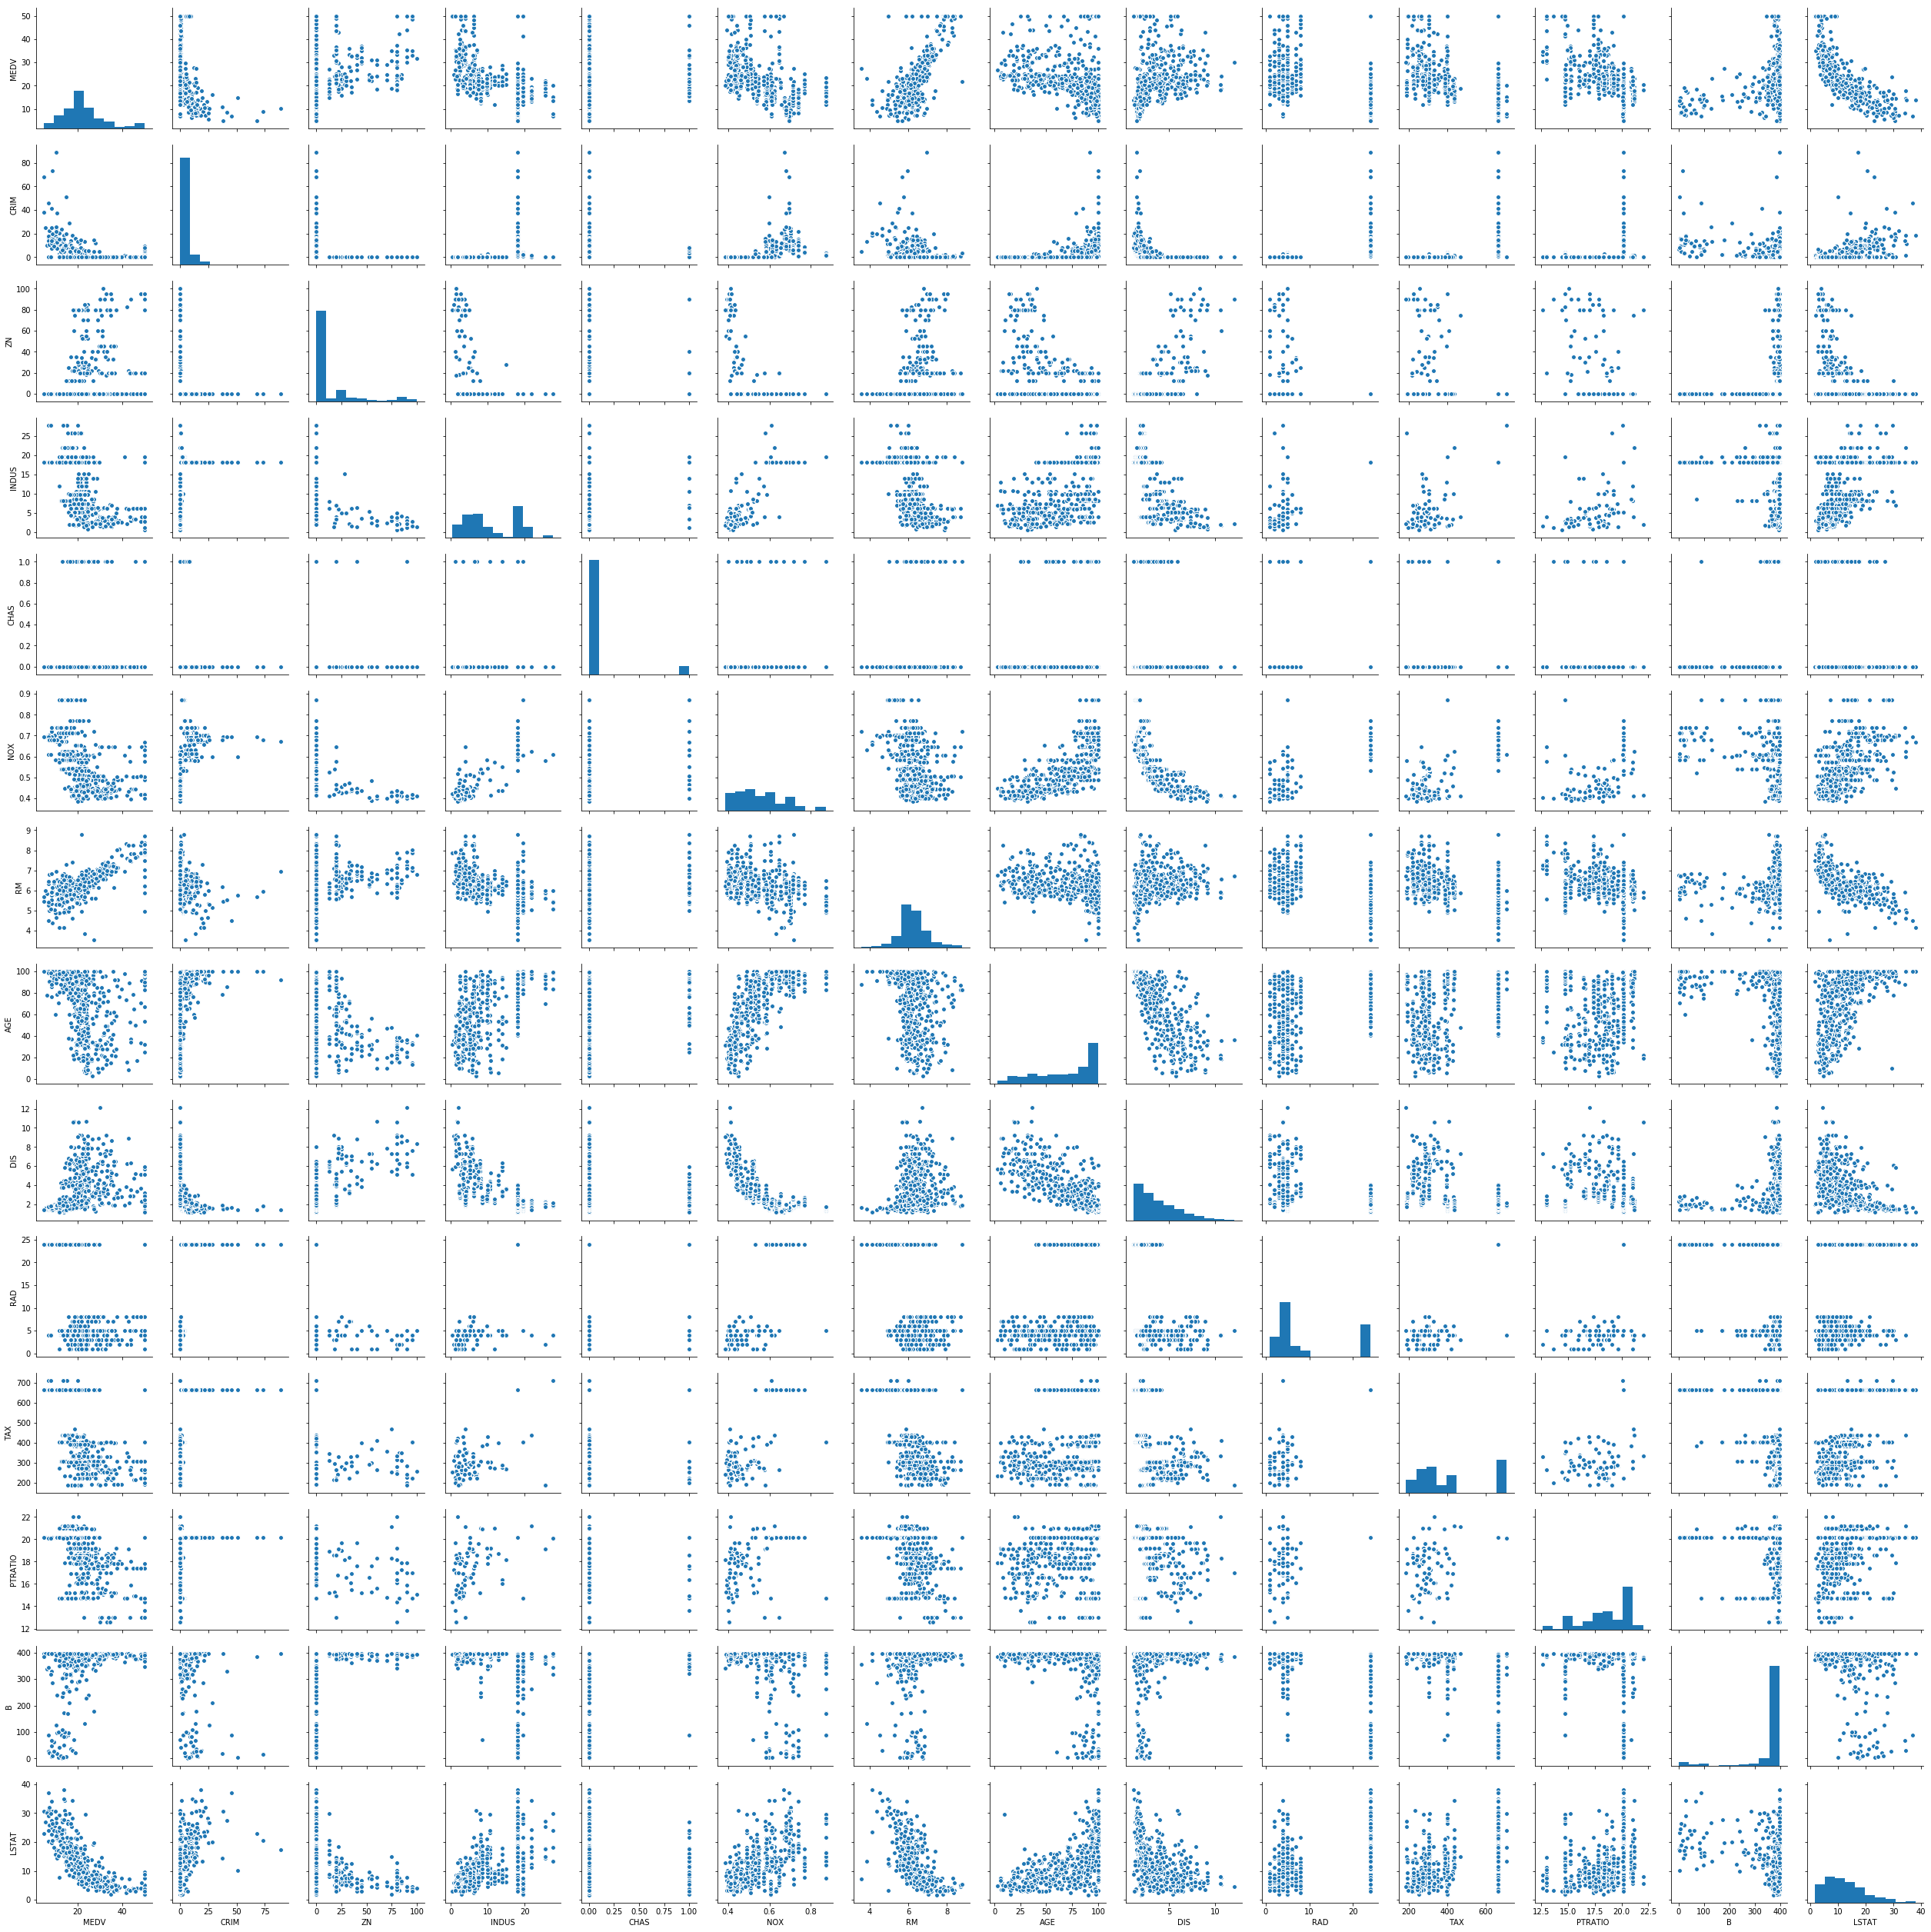

In [28]:
sns.pairplot(tdf)

In [29]:
X = np.matrix(X)
y = np.matrix(y)

In [30]:
## add bias to X or standardize X and y
## why standardize X and y?

In [31]:
# add bias into X
X = sma.add_constant(X)

In [32]:
DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Regression

Regression attempts to model the relationship between some dependent variable (target, endogenous variable) and a set of independent variables (features, exogenous variables).  We typically make some simple hypothesis and tune the hypothesis via optimization.  

The hypothesis we typically make for regression is that the expected value of the target variable is related in some way (via hypothesis) to a linear combination of features.  This is a __generalized linear model__.  

Examples of generalized linear models
* Linear regression - the hypothesis is the identify function explains the mean
* Poisson model - the hypothesis can be the exponential function 
* Binomial Model (logistic regression) - the hypothesis is the sigmoid function.  We'll see this function later

Our hypothesis won't be perfect - there will be error / cost,  but we will tune the hypothesis to make the error / cost as small as possible.

## Fitting a Linear Regression

Fitting a linear regression is a fairly simply procedure, but can be prove difficult if there are a significant number of observations, or if there are more features than observations.  

We hypothesize that our target variable $y$ can be written as a linear combination of features $X_1, X_2, \ldots, X_n$, i.e., 

$$y = a + b_1X_1 + b_2X_2 + \cdots + b_nX_n + \epsilon$$

Above, $\epsilon$ is the error.  We can write this succinctly in matrix form as 

$$y = X\beta + \epsilon$$

Our objective now is to attempt to provide the single "best" estimate of the weights (best is not used here in the BLUE sense).  This is known as point estimation.  An easily justified method to select "best" estimates is be minimizing the average squared distance between the target and the linear projection of our target on the feature space ($\|y - X\beta\|_2$).  

$$C(\beta) = \frac{1}{N}\sum_{i=1}^N (y_i - X_i\beta)^2$$

One way to solve this problem is directly via  

$$ \beta^* = (X^TX)^{-1}X^Ty $$

#### Aside:
Difference between minimizing $\sum(y_i - b)^2$ and $\sum|y_i - b|$ with respect to $b$.  For the first summand, the minimizer is $b = \bar{y}$, i.e., the empirical mean.  In the second summand, the empirical median is the minimizer.  

In [33]:
parameters = ["bias"]
parameters.extend(lin_reg_data.feature_names)

In [34]:
## solution to the least squares problem
beta_normal_eq = np.linalg.inv(X.T*X)*X.T*y
print( DataFrame(beta_normal_eq, index=parameters, columns=["parameters"]))

         parameters
bias      36.491103
CRIM      -0.107171
ZN         0.046395
INDUS      0.020860
CHAS       2.688561
NOX      -17.795759
RM         3.804752
AGE        0.000751
DIS       -1.475759
RAD        0.305655
TAX       -0.012329
PTRATIO   -0.953464
B          0.009393
LSTAT     -0.525467


How to interpret?

The variable RM with coefficient 3.80.  As the average number of rooms per dwelling increases by 1 room, the median val of the owner occupied home increases by 3.8 (thousand) dollars (on average)

A typical measure for assessing goodness of fit with a linear model is to calculate the $R^2$ statistic.  You can think of this as the lift provided by the model over no model (just use the average of $y$ as the prediction)

In [35]:
## r^2
def r2(x,y,beta):
    yhat = x*beta
    e = y - yhat
    ess = (e.T*e)[0,0]
    tss = ((y - y.mean()).T*(y - y.mean()))[0,0]
    return 1 - ess/tss

print(r2(X,y,beta_normal_eq))

0.740607742865


#### Regularization 

Problems we can run into when estimating a regression
1.  The model "memorizes" the data.  This is called overfitting
2.  There are more variables than observations (no solution to the least squares problem)
3.  Highly correlated features (no solution).

The second two problems affect the stability of the estimates, the first is indicative when the model doesn't generalize.  

We typically assume that there are more rows than columns or that correlation among columns is small (in the absolute sense), but there will be instances where there are (many) more columns than rows, or variables that have correlation close to 1.  When this happens, the covariance matrix is singular or nearly singular.    

One popular method to handle these problems is via ridge regression.  This method shrinks the coefficients of the regression towards zero and in the event of highly correlation features, the regression coefficients "borrow" from one another.  If you have an issue with the model memorizing the data, this will help the model generalize better.  

Starting with 

$$C(\beta) = \frac{1}{N}\sum_{i=1}^N (y_i - X_i\beta)^2$$

We add some penality, which is a function of $\beta$ as well.  The penalty will be used to keep the model from saturating.  A penalty which lends itself well to this problem is the $L^2$ norm.   

$$C^*(\beta) = \frac{1}{2} C(\beta) + \frac{\lambda}{2} \|\beta\|_2^2$$

There is a closed form solution to this problem is given by the normal equations to the above cost function

$$\hat{\beta} = (x^Tx + \lambda I)^{-1} x^Ty$$

Basically, we add a small amount to the diagonal of covariance matrix of $x$ to insure invertibility so that the solution exists.  

Above, we just introduced the notion of regularization.  We added a penalty to the optimization problem, and now the solution offers a trade off between fit and its norm.  This can help with overfitting and stability of the model with highly correlated predictors and when the number of features is large.  This regularization is easily implemented when learning neural networks, and that is why we introduce it here.  

Important note - we do NOT want to regularize the bias.

## Exercise 1

Estimate the regression with regularization

I recommend standardizing the data first

If you don't standardize the data, set the (0,0) element in $\lambda I$ equal to 0

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

## Exercise 2

Pick an optimal value for lambda

## Optimization

### Global vs Local Optimum

If $f$ is a function and $x$ a point in the domain of $f$ such that $f(x) \le f(y)$ for all other $y$ in the domain of $f$.  Then we say that $x$ is a global optimum.  

On the other hand, given an $x$ in the domain of $f$ and if there exists open interval containing $x$ such that $f(x) \le f(y)$ for all $y$ in the open interval then we say that $x$ is a local optimum.  

In the least square (our linear regression) optimization problem we found the global solution.  We are certain that it is global because the least square problem is a convex optimization problem.  

Convex optimization problems are special - if a local optimium exists, then it must be a global optimum.  

## Gradient Descent

Linear regression is fairly simple to solve (as shown above).  The least squares cost function lends itself to a nice closed form solution (exact), but sometimes (with other cost functions) that is not always the case and we  we must settle for a numerical (approximate) solutions.  

Additionally, the least squares solution is very easy to calculate when the number of features and observations are reasonalbe, but sometimes  but that is not always the case.  Suppose that our feature matrix $X$ is $m \times n$, i.e, $m$ rows and $n$ features.  Solving the linear regression would require several steps of varying [complexity](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra)

Gradient descent is a first order optimization method, that is, it only uses first derivatives to solve the optimization problem (i.e., find a local extremum).  

This method is so great because 

* you don't need to work about the hessian of the objective function (the matrix of partial derivatives).  Consider Newton Rhapson (another optimization routine) method which requires calculating the hessian and then inverting it.  If there are $p$ parameters to solve for, the Hessian will be $p \times p$.  This can be very expensive for large problems!! 
* it is very easy to implement
* it is embarrasingly parrallelizable
* its extension, Stochastic Gradient Descent is very popular in training neural nets.  


### Intuition behind gradient descent

For intuitions sake, lets consider $f: \mathbb{R} \to \mathbb{R}$ (fancy way of writting a function with one parameter which maps real numbers to real numbers) which is at least differentiable on its domain. We know that for any $x$ in the domain of $f$, we have 

$$f\big(x - \epsilon \;\text{sign}(f'(x)\big) \le f(x)$$ 

for small enough $\epsilon$.  The function sign($x$) is 1 when $x > 0$, -1 when $x < 0$ and 0 otherwise.  To see this, suppose that for some $x$ in domain of $f$, and $f'(x) > 0$, then $f$ is increasing at $x$, thus there exists $\epsilon > 0$ such that $f(x - \epsilon) < f(x)$.  On the other hand, if $f'(x) < 0$ then there exists $\epsilon > 0$ such that $f(x + \epsilon) < f(x)$.  Lastly if $f'(x) = 0$, then we are at a (local) optimum.  This means that we can reduce $f$ by moving $x$ by a small amount in the direction opposite the sign of its derivative.  Once $f'(x) = 0$, the derivative provides no information about which direction to move.  

For the least squares problem described above, we can easily calculate the gradient.

$$C(\beta) = \frac{1}{N}\sum_{i=1}^N (y_i - X_i\beta)^2$$
then the gradient is given by
$$\nabla C(\beta) = \sum_{i=1}^N X_i^T(y_i - X_i\beta)$$

our gradient descent algorithm becomes
~~~
grad = -X'*(y - X*beta)
while norm(grad) > 1e-6
  grad = -X'*(y - X*beta)
  beta -= learning_rate * grad / n
~~~


## Linear Regression via Gradient Descent

In [36]:
## create the objective function 

class MSE(object):
    def valueAt( x, y, beta):
        yhat = x * b
        e = y - yhat
        return y.T*y / x.shape[0]
    def gradientAt(x, y, beta):
        yhat = x * beta
        e = y - yhat
        return -x.T*e / x.shape[0]
  
class L2(object):
    def valueAt(b):
        return 1/2*linalg.norm(b) 
    def gradientAt(b):
        return b
        
        
    
class GradientDescent(object):
    def __init__(self, cost_function=MSE, tolerance=1e-6, regularization=None):
        self.cost_function = cost_function
        self.tol = tolerance
        self.iter = 0
        self.beta = None
        self.regularization = regularization
        
    def optimize(self, X,y,learning_rate=0.1,init_params=None):
        if init_params is None:
            beta = np.matrix( np.zeros(X.shape[1])).T
        else:
            beta = init_params
        grad = self.cost_function.gradientAt(X,y,beta)
        if self.regularization is not None:
            pass
        prev_beta = beta
        beta = beta - learning_rate*grad
        ## several termination criteria to use
        ## abs change in beta is small
        ## abs change in beta / norm of beta 
        ## abs change in object is small
        ## here we use magitute of the gradient
        while np.linalg.norm(prev_beta - beta)/np.linalg.norm(beta) > self.tol:
            prev_beta = beta
            self.iter += 1
            grad = self.cost_function.gradientAt(X,y,beta)
            if self.regularization is not None:
                pass
            beta = beta - learning_rate*grad
        self.beta = beta
        return beta

In [42]:
sbeta_gd = linear_regression.optimize(X,y,learning_rate=0.1)
DataFrame( np.concatenate( (beta_normal_eq, sbeta_gd),axis=1),
          index = parameters,
          columns = ["ols beta", "gd beta"])

C:\Users\Whittakert\Anaconda3\envs\pgh_data_science\lib\site-packages\ipykernel\__main__.py:44: RuntimeWarning: invalid value encountered in double_scalars


,ols beta,gd beta
bias,36.491103,1.470957e+153
CRIM,-0.107171,6.562250e+153
ZN,0.046395,1.466826e+154
INDUS,0.020860,1.777679e+154
CHAS,2.688561,1.006712e+152
NOX,-17.795759,8.370401e+152
RM,3.804752,9.184841e+153
AGE,0.000751,1.049366e+155
DIS,-1.475759,5.268676e+153
RAD,0.305655,1.626340e+154


This illustrates an issue with Gradient Descent.  Scaling of variables can wreak havoc on the optimization

In [43]:
## what happened here??

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X[:,1:])  ## returns a ndarray, not a matrix :( 
y = standardScaler.fit_transform(y)

In [44]:
X = np.matrix(X)
y = np.matrix(y)

In [45]:
sbeta_gd = linear_regression.optimize(X,y,learning_rate=0.1)
DataFrame( np.concatenate( (np.linalg.pinv(X)*y, sbeta_gd),axis=1),
          index = lin_reg_data.feature_names,
          columns = ["ols beta", "gd beta"])

,ols beta,gd beta
CRIM,-0.100175,-0.100170
ZN,0.117651,0.117641
INDUS,0.015560,0.015529
CHAS,0.074249,0.074254
NOX,-0.224215,-0.224210
RM,0.290666,0.290672
AGE,0.002299,0.002294
DIS,-0.337880,-0.337883
RAD,0.289376,0.289297
TAX,-0.225936,-0.225846


## exercise 3

Add regularization into the gradient descent??

## Fitting a Logistic Regression

Given a categorical variable $y$ with 2 classes (binary variable), $y$ can best be described as a Bernoulli random variable - which is a random variable that takes the value $A$ with probability $p$ and the value $B$ with probability $1 - p$.  

We are interested in modeling the posterior probabilities of the 2 classes via some linear function in $x$.  

$y$ can best be described as a Bernoulli random variable, that is a variable that can assume two values

The model takes the form

$$ \log \frac{ \mathbb{P}(y = 1 | X = x) }{ \mathbb{P}(y = 0 | X = x) } = x\beta $$

The function on left hand side is known as the logit function.  

It can be shown then that 
$$ \mathbb{P}(y = 1 | X = x) = \frac{\exp(x\beta)}{(1 + \exp(x\beta)}$$
The function on the right is the __sigmoid function__ and is strictly between 0 and 1.  
and 
$$ \mathbb{P}(y = 0 | X = x) = 1 - \mathbb{P}(y = 1 | X = x)$$ 

We will use objective function 

$$-\sum_{i=1}^N \big(y_i\log(p_i) + (1 - y_i)\log(1 - p_i)\big)$$

Unfortunately, there is not closed form solution to this problem and must be solved numerically, but the good thing is that it is convex - so any local optimum is a global optimum.  

In [46]:
## generate data for logistic regression
X, g = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.1)

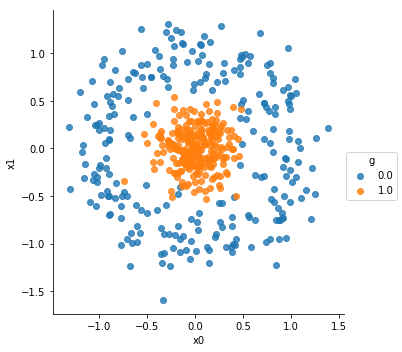

In [47]:
X = np.matrix(X)
g = np.matrix(g).T
logistic_reg_data = DataFrame( np.concatenate((X, g),axis=1), columns = ["x0", "x1", "g"])
sns.lmplot('x0','x1',logistic_reg_data,hue='g',fit_reg=False)

In [48]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

## creating this as object to expose value and gradient methods 
class BCE(object):
    
    def valueAt( x, y, beta):
        p = sigmoid(x*beta)
        ll = y.T*(np.log(p + 1e-3)) + (1 - y).T*( np.log(1 - p + 1e-3))
        return -ll / x.shape[0]
        
    def gradientAt( x, y, beta):
        p = sigmoid(x*beta)
        grad = x.T.dot(y - p) / x.shape[0]
        return -grad

In [49]:
# let's add in the square of each X
X = np.concatenate( (X, np.multiply(X,X)) ,axis=1)

In [50]:
X = sma.add_constant(X)

In [51]:
logistic_regression = GradientDescent(BCE, tolerance=1e-7)
b = logistic_regression.optimize(X,g,learning_rate=10) ## show the perils of large learning rate
print("iterations: {}".format(logistic_regression.iter))
print(logistic_regression.beta.T)
BCE.valueAt(X,g,b)

iterations: 7081
[[  6.87189114  -1.5452632    0.43632932 -18.83842846 -19.94394414]]


matrix([[ 0.05699125]])

That's alot of iterations!  We can improve it by standardizing the features and playing with the learning rate

In [52]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X[:,1:])
X = np.matrix(X)
X = sma.add_constant(X)

logistic_regression = GradientDescent(BCE, tolerance=1e-7)
b = logistic_regression.optimize(X,g,learning_rate=10) ## show the perils of large learning rate
print("iterations: {}".format(logistic_regression.iter))
print(logistic_regression.beta.T)
BCE.valueAt(X,g,b)

iterations: 1583
[[-4.24613477 -0.81655168  0.23639975 -7.32065413 -8.06246855]]


matrix([[ 0.05699114]])

## Model Performance

In [53]:
logistic_reg_data["phat"] = 1*(sigmoid(X.dot(logistic_regression.beta))>0.5)
logistic_reg_data.head()

,x0,x1,g,phat
0,0.207810,0.258504,1.0,1
1,0.261353,-0.072018,1.0,1
2,0.464686,0.940512,0.0,0
3,-0.328772,0.766245,0.0,0
4,0.227187,-0.273839,1.0,1


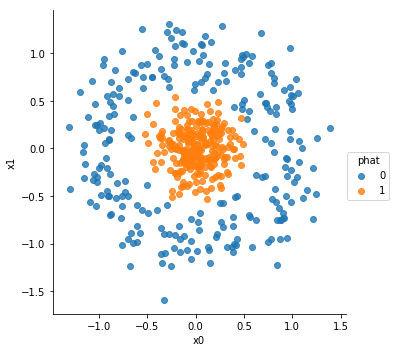

In [54]:
sns.lmplot('x0','x1',logistic_reg_data,hue='phat',fit_reg=False)

In [55]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
## https://github.com/yhat/pandasql
pysqldf("select g, phat, sum(1) as n from logistic_reg_data group by g, phat;")

,g,phat,n
0,0.0,0,244
1,0.0,1,6
2,1.0,0,4
3,1.0,1,246


In [56]:
## need precision and recall and accuracy, maybe f1

# Other APIs

## Statsmodels

In [57]:
import statsmodels.api as sma
import statsmodels as sm
fit = sma.GLM(endog = g, exog=X, family = sma.families.Binomial()).fit()
print(fit.summary())
sm_parms = fit.params

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      495
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -29.169
Date:                Sun, 31 Dec 2017   Deviance:                       58.338
Time:                        01:13:19   Pearson chi2:                     180.
No. Iterations:                    10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2462      0.843     -5.037      0.000      -5.898      -2.594
x1            -0.8166      0.519     -1.575      0.1

## Scikit learn

In [58]:
from sklearn.linear_model import SGDClassifier as SGD

In [59]:
sgd = SGD(loss='log', fit_intercept=False, max_iter=1000, learning_rate = "optimal", penalty=None)

In [60]:
sgd_fit = sgd.fit(X, np.array(g.T)[0])

In [61]:
sklearn_parms = sgd_fit.coef_
print(sklearn_parms)

[[-4.25546431 -0.82002096  0.23622046 -7.32428927 -8.06120236]]


## TensorFlow

Next, we'll estimate the same logistic regression via TensorFlow

In [62]:
import tensorflow as tf

In [63]:
nobs, n_features = X.shape

# create the computational graph

learning_rate = tf.placeholder("float") # learning rate
xt = tf.placeholder("float", shape = [None, n_features]) # x as a tensor
yt = tf.placeholder("float", shape = [None, 1]) # y as a tensor
weights = tf.Variable(tf.random_normal([n_features,1]), name="weights" )
logits = tf.matmul(xt, weights) ## notice we don't apply the sigmoid function at all
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = yt))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# run the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(500):
        sess.run(optimizer, feed_dict = {yt: g, xt: X, learning_rate: 17 })
    tf_parms = sess.run(weights)
    print(tf_parms.T)
    

[[-4.23913574 -0.81542867  0.23539272 -7.31053734 -8.05221462]]


In [64]:

parms = DataFrame([np.array(b).ravel(), tf_parms.ravel(), sklearn_parms.ravel(), sm_parms]).T
parms.columns = ["gd from scracth", "tensorflow", "sklearn", "statsmodels"]
parms

,gd from scracth,tensorflow,sklearn,statsmodels
0,-4.246135,-4.239136,-4.255464,-4.246218
1,-0.816552,-0.815429,-0.820021,-0.816565
2,0.236400,0.235393,0.236220,0.236412
3,-7.320654,-7.310537,-7.324289,-7.320775
4,-8.062469,-8.052215,-8.061202,-8.062591
